LANIA Data challenge Industrial DCI 2.0 (examen Ricardo Báez Mulia y Carlos Escalante Pedraza)

Populating the interactive namespace from numpy and matplotlib


/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(56, 6)

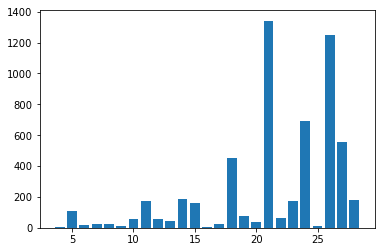

In [158]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt #matplotlib.pyplot plots data
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

Equipos = pd.read_excel('equipos.xlsx',sheetname=0)

# "".loc[]
# "el nombre del excel con el que estas trabajando".loc 
# lo que esta dentro del corchete es donde se van a realizar los cambios
# localiza en el excel, para depues realizar la accion que quieras

# Filtras los ID con valor de 160 asignandole el valor 1, ya que esos son los unicos que 
# termina con el ciclo de trabajo "Entregado" para todo lo demas se asigna el valor de 0 lo
# cual se usara para comparar con las formas de pago y así poder obtener el ciclo completo

Equipos.loc[Equipos['ESTATUS_ID'] == '1', "ESTATUS_ID"] = "0"
Equipos.loc[Equipos['ESTATUS_ID'] == '160' , "ESTATUS_ID"] = "1"
Equipos.loc[Equipos['ESTATUS_ID'] != '1' , "ESTATUS_ID"] = "0"

# Filtras Todos las formas de pago que no tengan sentido asignandole el valor de cero
# para todos aquellos que no tengan el valor cero se le asigna un valor 1 lo cual implica 
# que se realizo un pago.
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'CL1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'NOESP' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'VB1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'VM1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'XA1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'XC1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'].isnull()  , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] != "0" , "FORMA_DE_PAGO"] = "1"
# Creas una nueva columna con el encabezado de CICLO_COMPLETO el cual pone los valores de
# ESTATUS_ID siempre y cuando sean estos iguales a los valores de FORMA_DE_PAGO
Equipos['CICLO_COMPLETO'] = Equipos['ESTATUS_ID'][(Equipos['ESTATUS_ID'] == Equipos['FORMA_DE_PAGO'] )] 
# Esta parte es para visualizar que se realizó de manera correcta el filtardo de datos.
Equipos.head()

Equipos.loc[Equipos['CICLO_COMPLETO'].isnull()  , "CICLO_COMPLETO"] = "0"

# Es una forma alternativa de eliminar las columnas que no deseas, sin embargo se optará 
# por crear un data frame que solo contenga las columnas que queramos.

Equipos.drop(['NUM_ORDEN','TIPO_REPARACION','SOFTWARE','USUARIO_ID','CLIENTE_ID','FIXKEY','SUCURSAL',
              'DESEA_RECIBIR_PROMOCIONES','COMO_TE_ENTERASTE','IPHONE_COMPRADO_EN_PAIS','ARCHIVO_REMISION',
              'SUCURSAL_ID','DESEA_RECIBIR_PROMOCIONES','NOTA_O_FACTURA','ARCHIVO_REMISION','HORA_FACTURADO','EQUIPO_ID_REAJUSTE',
              'FECHA_DE_DIAGNOSTICO','FECHA_HORA_REMISION','FECHA_HORA_REMISION_ANTICIPO'],1,inplace=True)  

# En esta parte se obtinene todos las filas que tengan como valor de cICLO_COMPLETO = 1 
# lo cual implica que se pago y se entrego de manera exitosa  
Equipos = Equipos[Equipos.CICLO_COMPLETO != "0"]
# Le asignamos las celdas que no tengan un valor con cero
# Para todos los demas tipos de modelos les asignamos un valor del 1 al 28 para que
# podamos clasificarlos
Equipos.loc[Equipos['MODELO'].isnull()  , "MODELO"] = 0
Equipos.loc[Equipos['MODELO'] == 'A1019'  , "MODELO"] = 1
Equipos.loc[Equipos['MODELO'] == 'A1040'  , "MODELO"] = 2
Equipos.loc[Equipos['MODELO'] == 'A1051'  , "MODELO"] = 3
Equipos.loc[Equipos['MODELO'] == 'A1099'  , "MODELO"] = 4
Equipos.loc[Equipos['MODELO'] == 'A1136'  , "MODELO"] = 5
Equipos.loc[Equipos['MODELO'] == 'A1137'  , "MODELO"] = 6
Equipos.loc[Equipos['MODELO'] == 'A1199'  , "MODELO"] = 7
Equipos.loc[Equipos['MODELO'] == 'A1203'  , "MODELO"] = 8
Equipos.loc[Equipos['MODELO'] == 'A1204'  , "MODELO"] = 9
Equipos.loc[Equipos['MODELO'] == 'A1213'  , "MODELO"] = 10
Equipos.loc[Equipos['MODELO'] == 'A1218'  , "MODELO"] = 11
Equipos.loc[Equipos['MODELO'] == 'A1219'  , "MODELO"] = 12
Equipos.loc[Equipos['MODELO'] == 'A1236'  , "MODELO"] = 13
Equipos.loc[Equipos['MODELO'] == 'A1238'  , "MODELO"] = 14
Equipos.loc[Equipos['MODELO'] == 'A1241'  , "MODELO"] = 15
Equipos.loc[Equipos['MODELO'] == 'A1271'  , "MODELO"] = 16
Equipos.loc[Equipos['MODELO'] == 'A1285'  , "MODELO"] = 17
Equipos.loc[Equipos['MODELO'] == 'A1303'  , "MODELO"] = 18
Equipos.loc[Equipos['MODELO'] == 'A1318'  , "MODELO"] = 19
Equipos.loc[Equipos['MODELO'] == 'A1320'  , "MODELO"] = 20
Equipos.loc[Equipos['MODELO'] == 'A1332'  , "MODELO"] = 21 # Estos modelos Correponden a estos tipos de equipos= iphone4 · , iphone4s · , iphone6
Equipos.loc[Equipos['MODELO'] == 'A1337'  , "MODELO"] = 22
Equipos.loc[Equipos['MODELO'] == 'A1366'  , "MODELO"] = 23
Equipos.loc[Equipos['MODELO'] == 'A1367'  , "MODELO"] = 24 # Estos modelos Correponden a estos tipos de equipos= ipod touch4 ·
Equipos.loc[Equipos['MODELO'] == 'A1373'  , "MODELO"] = 25
Equipos.loc[Equipos['MODELO'] == 'A1387'  , "MODELO"] = 26 # Estos modelos Correponden a estos tipos de equipos= iphone4, iphone4s, iphone5 ·, iphone5s
Equipos.loc[Equipos['MODELO'] == 'A1395'  , "MODELO"] = 27
Equipos.loc[Equipos['MODELO'] == 'A1396'  , "MODELO"] = 28
Equipos.loc[Equipos['MODELO'] == 'N'  , "MODELO"] = 0
Equipos.loc[Equipos['MODELO'] == 'S'  , "MODELO"] = 0

from collections import Counter
mod = Counter(Equipos['MODELO'])
#mod.keys()
#para mostrar los valores en x
#mod.values()
x=[ 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
#[x=0,y=3519] no se ponen porque altera la proporción
y=[ 8, 112, 17, 24, 26, 11, 60, 173, 56, 44, 187, 162, 7, 27, 450, 79, 35, 1342, 62, 171, 694, 11, 1252, 554, 178]
#with the preview values get from mod.values MODELO
plt.bar(x, y)

# Se plotea los valores de los modelos en base a la cantidad de veces que se repitio el modelo
# Se puede concluir que los equipos que más se reparan son el iphone4, iphone4s, iphone5 y 
# iphone5s que corresponden a la fila 21 y 26 los cuales son los modelos A1387 y A1332 que se  
# usan para la reparación de dichos equipos.

Equipos['FECHA_DE_ENTREGA'] = pd.to_datetime(Equipos.FECHA_DE_ENTREGA)
Equipos['FECHA_RECIBIDO'] = pd.to_datetime(Equipos.FECHA_RECIBIDO)
# Se transforman los distintos tipos de datos con formato datatime (formato de tipo especial 
# de pandas) para que se puede despues plotear en una grafica de barra.

d1 = pd.to_datetime(Equipos.FECHA_DE_ENTREGA)
d2 = pd.to_datetime(Equipos.FECHA_RECIBIDO)
# Se transforman los distintos tipos de datos con formato datatime (formato de tipo especial 
# de pandas) para que se puede después plotear en una gráfica de barra.
# Se usaran estas varibles eventualmente para poder compararlas y restringir la fecha.

f = Equipos.loc[Equipos['FECHA_RECIBIDO'] > Equipos['FECHA_DE_ENTREGA'],['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   
f.shape
# Con esto solo estas tomando en cuenta los valores mayores de FECHA_RECIBIDO 
# a los valores de FECHA_DE_ENTREGA para que así quitemos los valores falsos de 1970
# se muestran las columnas de 'ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO'

f = f.loc[d1.dt.year == d2.dt.year,['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   
# se muestran las columnas de 'ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO'
# de aquellos valores que sean en el mismo año.

days = f['FECHA_RECIBIDO'].dt.dayofyear - f['FECHA_DE_ENTREGA'].dt.dayofyear
# se realiza una resta de los dias del año para que asi abarquen los meses y los días para 
# que este sea nuestro umbral con el cual se mostraran los equipos que hayan pasado por un 
# máximo de 14 días.
f = f.loc[days <= 14,['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   
f.shape
# Muestran los equipos que se entregaron a tiempo = 56 ya que te muestran las filas por columna
# de la tabla

# podemos conluir que pocos celulares fueron tregados en un tiempo razonable de tiempo 


In [159]:
f
#Muestra la cantidad de equipos que cumplieron con el rango de tiempo de 14 dias
#como se puede observar son muy pocos por lo cual se puede intuir que las reparaciones y
#entregas no se estan haciendo en un periodo adecuado de tiempo ya que son pocos los que 
#cumplen un plazo máximo de 2 semanas 

,ID,ESTATUS,TIPO,MODELO,FECHA_DE_ENTREGA,FECHA_RECIBIDO
572,590,Entregado,iPodVideo5,5,2012-10-11,2012-10-24
881,897,Entregado,iPadWiFi2,27,2013-01-28,2013-02-01
893,908,Entregado,iPhone3GS,18,2013-01-22,2013-02-01
980,998,Entregado,iPodTouch5,0,2013-01-08,2013-01-15
1202,1219,Entregado,iPodTouch4,24,2013-03-21,2013-04-03
1445,1462,Entregado,iPadMINIWiFi,0,2013-04-06,2013-04-20
1488,1548,Entregado,iPhone4,21,2013-05-23,2013-06-05
1617,1632,Entregado,iPhone4S,26,2013-05-06,2013-05-17
1721,1739,Entregado,iPodTouch3,19,2013-06-28,2013-07-06
1985,2003,Entregado,iPhone4S,26,2013-07-08,2013-07-22


<bound method Series.max of 2015-02-01    5
2013-02-01    2
2015-08-07    2
2015-06-05    2
2014-05-04    2
2013-05-14    2
2015-03-02    2
2014-08-21    1
2015-04-13    1
2015-08-21    1
2014-02-01    1
2014-08-19    1
2013-11-18    1
2014-03-16    1
2015-04-02    1
2015-07-14    1
2014-07-06    1
2013-04-20    1
2014-08-07    1
2013-07-22    1
2015-12-10    1
2013-11-23    1
2015-05-18    1
2013-09-24    1
2013-04-03    1
2013-12-11    1
2013-09-20    1
2013-01-15    1
2013-06-05    1
2013-11-22    1
2015-04-16    1
2013-06-19    1
2014-11-10    1
2013-11-26    1
2014-07-22    1
2014-03-13    1
2014-04-02    1
2014-08-18    1
2015-08-19    1
2014-12-11    1
2012-10-24    1
2013-07-06    1
2013-05-17    1
2015-04-15    1
2014-05-02    1
2013-11-10    1
Name: FECHA_RECIBIDO, dtype: int64>

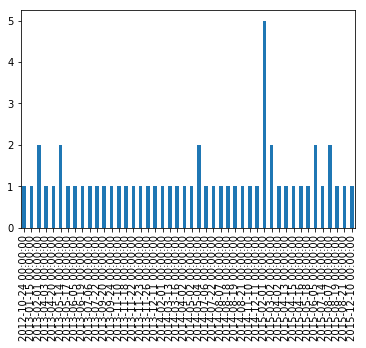

In [160]:
f.FECHA_RECIBIDO.value_counts().sort_index().plot.bar()
f.FECHA_RECIBIDO.value_counts().max
# Graficamos los tiempos y analizamos que el periodo donde más se realizaron reparaciones fue
# 2015-02-01 con un total de 5

In [161]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt #matplotlib.pyplot plots data
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Se realiza exactamente lo mismo que en el primer objetivo.
Equipos = pd.read_excel('equipos.xlsx',sheetname=0)


Equipos.loc[Equipos['ESTATUS_ID'] == '1', "ESTATUS_ID"] = "0"
Equipos.loc[Equipos['ESTATUS_ID'] == '160' , "ESTATUS_ID"] = "1"
Equipos.loc[Equipos['ESTATUS_ID'] != '1' , "ESTATUS_ID"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'CL1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'NOESP' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'VB1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'VM1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'XA1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'XC1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'].isnull()  , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] != "0" , "FORMA_DE_PAGO"] = "1"
Equipos['CICLO_COMPLETO'] = Equipos['ESTATUS_ID'][(Equipos['ESTATUS_ID'] == Equipos['FORMA_DE_PAGO'] )]  
Equipos.loc[Equipos['CICLO_COMPLETO'].isnull()  , "CICLO_COMPLETO"] = "0"

Equipos.loc[Equipos['DIAGNOSTICO'].isnull()  , "DIAGNOSTICO"] = 0
Equipos.loc[Equipos['DIAGNOSTICO'] == 'Bateria' , "DIAGNOSTICO"] = "1"

w2filt = "Bateria"
#if Equipos.loc[Equipos['DIAGNOSTICO'].find("Bateria") < 0:
    
#Equipos.loc[Equipos['DIAGNOSTICO'].isin('Bateria')  , "DIAGNOSTICO"] = 1
#Equipos.loc[Equipos['DIAGNOSTICO']].replace({'Bateria':'1'},inplace=True)


diagn = Counter(Equipos['DIAGNOSTICO'])
diagn.keys()
#diagn.values()
#x=[ 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
#[x=0,y=3519] no se ponen por que alterar la proporción
#y=[ 8, 112, 17, 24, 26, 11, 60, 173, 56, 44, 187, 162, 7, 27, 450, 79, 35, 1342, 62, 171, 694, 11, 1252, 554, 178]
#with the preview values get from mod.values MODELO
#plt.bar(x, y)

Populating the interactive namespace from numpy and matplotlib


/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


dict_keys([0, 'Costo de ajuste y limpieza iPad air 2 $999.00 ', 'cambio de mosulo sensor ', 'Se hizo cambio de cristal trasro', 'El equipo tiene un fallo en la bateria, ya no retiene carga, se hicieron pruebas con pieza nueva y el equipo funciona de manera correcta, la pantalla sigue con manchas muy pronunciadas y se recomienda no cambiar hasta que pase algun tiempo y se mantenga en prueba', 'Falla', 'Cambio de pantalla ', 'pantalla manchada. falla modulo de sensor y conector usb.', 'no queda con ajuste', 'Cambio de cristal trasero superior ', 'Se carga el equipo y funciona tiene una mancha por humedad, se nota la sulfatcion en la area de la pantalla, se limpio pero sigue la mancha', 'Requiere limpieza y ajuste, enderazar carcasa, poner adhesivos.', 'Cambio de toch', 'se cambio touch del equipo y se ajusto carcaza', 'l', 'CAMBIO DE PANTALLA TOUCH', 'No liberado.', 'el equipo necesita un cambio de pantalla para funcionar\\n', 'cambio de moudlo ', 'Cliente cancelo servicio y se hizo devo

Populating the interactive namespace from numpy and matplotlib


/Users/macbookpro/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(445, 6)

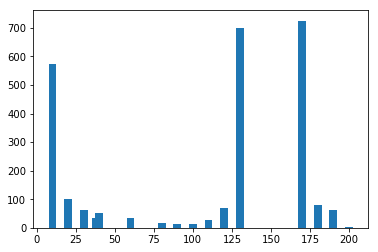

In [167]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt #matplotlib.pyplot plots data
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

Equipos = pd.read_excel('equipos.xlsx',sheetname=0)


#Equipos.loc[Equipos['ESTATUS_ID'] == '1', "ESTATUS_ID"] = "0"
Equipos.loc[Equipos['ESTATUS_ID'] == '160' , "ESTATUS_ID"] = "1"
#Equipos.loc[Equipos['ESTATUS_ID'] != '1' , "ESTATUS_ID"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'CL1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'NOESP' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'VB1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'VM1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'XA1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] == 'XC1' , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'].isnull()  , "FORMA_DE_PAGO"] = "0"
Equipos.loc[Equipos['FORMA_DE_PAGO'] != "0" , "FORMA_DE_PAGO"] = "1"
Equipos['CICLO_COMPLETO'] = Equipos['ESTATUS_ID'][(Equipos['ESTATUS_ID'] == Equipos['FORMA_DE_PAGO'] )]  
Equipos.loc[Equipos['CICLO_COMPLETO'].isnull()  , "CICLO_COMPLETO"] = "0"


#Equipos.drop(['NUM_ORDEN','TIPO_REPARACION','TIPO_REPARACION','SOFTWARE','USUARIO_ID','CLIENTE_ID','FIXKEY','SUCURSAL',
#              'DESEA_RECIBIR_PROMOCIONES','COMO_TE_ENTERASTE','IPHONE_COMPRADO_EN_PAIS','ARCHIVO_REMISION',
#              'SUCURSAL_ID','DESEA_RECIBIR_PROMOCIONES','NOTA_O_FACTURA','ARCHIVO_REMISION','HORA_FACTURADO','EQUIPO_ID_REAJUSTE',
#              'FECHA_DE_DIAGNOSTICO','FECHA_HORA_REMISION','FECHA_HORA_REMISION_ANTICIPO'],1,inplace=True)  
 
Equipos = Equipos[Equipos.CICLO_COMPLETO == "0"]
Equipos1 = Equipos[Equipos.CICLO_COMPLETO == "0"]
Equipos.head(384)
#Equipos.loc[Equipos['ESTATUS_ID'] != ('10','20','30','40','50','60','70','80','90','100','110','120','130','140','150','160','170','180','190','200','142','144','35','38','36'),['ESTATUS_ID']] = '0'  
Equipos=Equipos.loc[Equipos['ESTATUS_ID'].isin(['10','20','30','40','50','60','70','80','90','100','110','120','130','140','150','160','170','180','190','200','142','144','35','38','36']),['ID','ESTATUS','ESTATUS_ID','TIPO','MODELO','FORMA_DE_PAGO','FECHA_DE_ENTREGA','FECHA_RECIBIDO','CICLO_COMPLETO']]   
Equipos

estatus = Counter(Equipos['ESTATUS_ID'])
#estatus.keys()
#estatus.values()
x2=[40,110,100,170,130,90,80,20,180,200,30,120,190,38,60,10]
y2=[51,27,13,725,699,12,17,101,80,4,63,69,62,33,34,574]
plt.bar(x2, y2,5)
#los estados que mas salen  de la cadena son:170 (Abandonado),130 (Listo para entrega),10 (Recibido)

Equipos['FECHA_DE_ENTREGA'] = pd.to_datetime(Equipos.FECHA_DE_ENTREGA)
Equipos['FECHA_RECIBIDO'] = pd.to_datetime(Equipos.FECHA_RECIBIDO)

d1 = pd.to_datetime(Equipos.FECHA_DE_ENTREGA)
d2 = pd.to_datetime(Equipos.FECHA_RECIBIDO)

f = Equipos.loc[Equipos['FECHA_RECIBIDO'] > Equipos['FECHA_DE_ENTREGA'],['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   
f.shape
#f = f.loc[d1.dt.year == d2.dt.year,['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   
f = f.loc[d1.dt.year == d2.dt.year,['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   

#months_diff = f['FECHA_RECIBIDO'].dt.month  - f['FECHA_DE_ENTREGA'].dt.month
days = f['FECHA_RECIBIDO'].dt.dayofyear - f['FECHA_DE_ENTREGA'].dt.dayofyear

f = f.loc[days > 0,['ID','ESTATUS','TIPO','MODELO','FECHA_DE_ENTREGA','FECHA_RECIBIDO']]   
f.shape


In [168]:
f

,ID,ESTATUS,TIPO,MODELO,FECHA_DE_ENTREGA,FECHA_RECIBIDO
22,38,Donado a reciclaje,iPodPhoto4.5,A1099,2012-02-06,2012-05-30
42,58,Donado a reciclaje,iPhone3GS,A1303,2012-06-14,2012-11-06
322,337,Donado a reciclaje,iPodTouch2,A1218,2012-05-09,2012-08-31
376,394,Donado a reciclaje,iPodNano6,A1366,2012-09-15,2012-12-09
517,533,Abandonado,iPodVideo5,A1136,2012-10-17,2012-11-10
598,614,Abandonado,iPhone2G,A1203,2012-06-11,2012-10-31
725,741,Abandonado,iPodTouch2,A1218,2012-06-11,2012-11-30
901,916,Abandonado,iPodTouch1,A1213,2013-01-14,2013-03-01
926,943,Recibido,iPhone5,NaN,2013-01-16,2013-07-01
928,945,Recibido,iPad3G2,A1396,2013-01-18,2013-07-01


In [ ]:
# 1) Markham K. [dataschool]. (2016, julio, 19). How do I work with dates and times in pandas?. Recuperado de https://www.youtube.com/watch?v=yCgJGsg0Xa4.
# 2) Correoso, Kiko. (2012). PYBONACCI. Manual de introducción a matplotlib.pyplot (V): Tipos de gráfico (II), https://www.pybonacci.org/2012/06/23/manual-de-introduccion-a-matplotlib-pyplot-v-tipos-de-grafico-ii/
# 3) Albon Chris. (2017, diciembre, 20). Chis albon. https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/
# 4) Stack Overflow. (2017, febrero, 9). stackoverflow. https://stackoverflow.com/questions/42139624/proper-way-to-use-iloc-in-pandas?rq=1
# 5) Stack Overflow. (2017, Agosto, 4). Stackoverflow. https://stackoverflow.com/questions/45511603/pandas-set-values-on-iloc-nulls
# 6) Sweigart Al. Automate the Boring Stuff with Python. https://automatetheboringstuff.com
# 7) Wes McKinney & PyData Development. (2017, diciembre, 30). pandas 0.22.0 documentation. https://pandas.pydata.org/pandas-docs/stable/index.html#